In [0]:
def sig(z):
    return 1/(1+np.exp(-z))

In [0]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

In [0]:
def cost_func(a2,y_train_new,m):
    cost = -np.sum(y_train_new*np.log(a2)) / m
    return cost

In [0]:
def gradient_w2(a2,y_train_new,a1,m):
    error=a2 - y_train_new
    dw2= np.dot(np.transpose(a1), error) / m
    return dw2

In [0]:
def gradient_w1(a2,y_train_new,a1,weight2,X,m):
    #error=a2-y
    error=a2 - y_train_new
    #der_a1=a1(1-a1)
    der_a1=a1*(1-a1)
    #inter=np.dot(a2-y,w2.T)
    #inter=(a2-y)w2
    inter=np.dot(error, weight2.T)
    #inter1=(a2-y)w2(a1(a1-1))
    inter1=inter*der_a1
    #dw1=(1/m)*[((a2-y).dot(w2.T))*(a1*(a1-1))].dot(X.T)
    dw1=np.dot(X.T,inter1) / m
    return dw1

In [0]:
def gradient_b1(a2,y_train_new,a1,weight2,m):
    #error=a2-y
    error=a2 - y_train_new
    #der_a1=a1(1-a1)
    der_a1=a1*(1-a1)
    #inter=np.dot(a2-y,w2.T)
    inter=np.dot(error,weight2.T)
    #inter1=(a2-y)w2(a1(a1-1))
    inter1=inter*der_a1
    #row-wise sum of the matrix to obtain the same dimensions as bias1
    db1 = np.sum(inter1, axis=0, keepdims=True) / m
    return db1
    

In [0]:
def gradient_b2(a2,y_train_new,m):
    #error=a2-y
    error=a2 - y_train_new 
    #row-wise sum of the matrix to obtain the same dimensions as bias1
    db2= np.sum(error, axis=0, keepdims=True) / m
    return db2

In [0]:
def acc_train_val(y_train,a2):
      pred = np.zeros_like(a2)
      pred[np.arange(len(a2)), a2.argmax(1)] = 1
      acc=accuracy_score(y_train,pred)
      return acc

In [0]:
def test_val(X_test,y_test,w_final1,w_final2,b_final1,b_final2):
      my_dataset2=pd.DataFrame(y_test)
      dummies1=pd.get_dummies(my_dataset2[0])
      y_test_new1=dummies1.values
      z1=np.array(np.dot(X_test,w_final1)+b_final1)
      a1=sig(z1)
      z2=np.array(np.dot(a1,w_final2)+b_final2)
      a2=softmax(z2)
      pred = np.zeros_like(a2)
      pred[np.arange(len(a2)), a2.argmax(1)] = 1
      acc=accuracy_score(y_test_new1,pred)
      return acc

In [0]:
def test_val_confusion(X_test,y_test,w_final1,w_final2,b_final1,b_final2):
      my_dataset2=pd.DataFrame(y_test)
      dummies1=pd.get_dummies(my_dataset2[0])
      y_test_new1=dummies1.values
      z1=np.array(np.dot(X_test,w_final1)+b_final1)
      a1=sig(z1)
      z2=np.array(np.dot(a1,w_final2)+b_final2)
      a2=softmax(z2)
      pred = np.zeros_like(a2)
      pred[np.arange(len(a2)), a2.argmax(1)] = 1
      conf=confusion_matrix(y_test_new1.argmax(axis=1), pred.argmax(axis=1))
      return conf

In [0]:
def accuracy_calc(confusion_matrix_retrived,X_test):
    accuracy_lst=[]
    col=y.shape[1]
    row=y.shape[0]
    N_total=X_test.shape[0]
    for i in range(row):
      for j in range(col):
        if(i==j):
          accuracy_lst.append(y[i][j])
          j=j+1
      i=i+1
    accuracy=sum(accuracy_lst)
    accuracy=accuracy/N_total
    return accuracy

cost: 12.957492794596481
1
cost: 8.781618245695196
cost: 6.834922687777875
cost: 5.79680418853825
cost: 5.111407459804976
cost: 4.550517724279304
6
cost: 4.19269568178038
cost: 3.9237851243217783
cost: 3.6982735235197737
cost: 3.5068653968357753
cost: 3.342549167305948
11
cost: 3.199653996405854
cost: 3.0739469585848274
cost: 2.962253543324602
cost: 2.8621775517929655
cost: 2.7718763480648776
16
cost: 2.6898975583690423
cost: 2.615073299804692
cost: 2.54644577460615
cost: 2.4832196812364606
cost: 2.4247278519324458
21
cost: 2.3704074403825346
cost: 2.319781243013191
cost: 2.2724432706778233
cost: 2.2280467795166263
cost: 2.186294429890168
26
cost: 2.1469300412429955
cost: 2.1097318205332862
cost: 2.074506817532264
cost: 2.041086411681441
cost: 2.0093226016972805
31
cost: 1.9790849132314945
cost: 1.9502577824931786
cost: 1.922738326883246
cost: 1.8964344491736684
cost: 1.8712632408373207
36
cost: 1.8471496548577209
cost: 1.8240254164798837
cost: 1.8018281375010292
cost: 1.78050059883329

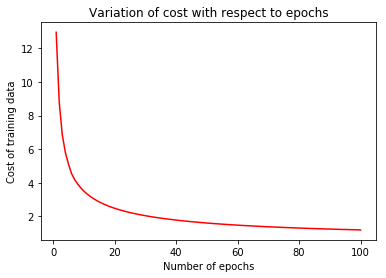

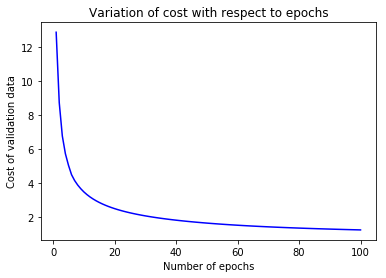

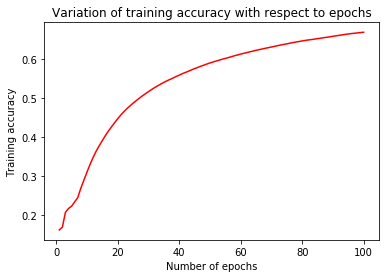

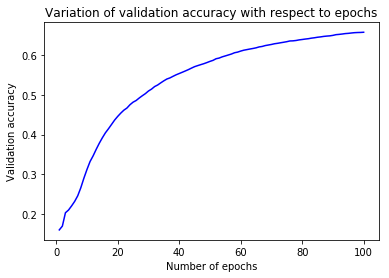

Accuracy of neural network with one hidden layer:  0.6587
Confusion matrix for neural network with one hidden layer: 
[[609  16  42 112  23   7 165   3  21   2]
 [ 17 873   9  61  12   5  14   2   6   1]
 [ 58   4 490   8 205  17 179   0  29  10]
 [115  49  32 669  45   8  62   3  17   0]
 [ 25   2 214  48 527   5 148   0  25   6]
 [ 13   1  17   4   4 681  29 128  52  71]
 [153   7 165  62 196  15 345   5  46   6]
 [  0   0   1   1   0 124   0 775  10  89]
 [  4   1  25  20  21  47  39  28 796  19]
 [ 11   2  11   0   1  69   9  64  11 822]]


In [12]:
#MODEL 1 => NEURAL NETWORK WITH ONE HIDDEN LAYER

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
np.random.seed(3)


mnist=tf.keras.datasets.fashion_mnist

#split the data into train and test set
(X_train1,y_train1),(X_test1,y_test1)=mnist.load_data()
#X_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
#X_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')
#X_train.shape = (60000, 784)
#y_train.shape = (60000,)

#Reshaping to flatten the image
X_train=np.reshape(X_train1,(60000,784))

#Reshaping to flatten the image
X_test=np.reshape(X_test1,(10000,784))

#Normalization of data
X_train=X_train/255.0
X_test=X_test/255.0

#extracting the labels of the X_train and converting to dataframe to use get.dummies in pandas 
my_dataset1=pd.DataFrame(y_train1)

#creating one-hot encoded vector. This will now become the labels of the X_train
dummies=pd.get_dummies(my_dataset1[0])
y_train2=dummies.values
#y_train.shape=(60000,10)

#creating one hot encoded vector for the test data label 
my_dataset2=pd.DataFrame(y_test1)
dummies1=pd.get_dummies(my_dataset2[0])
y_test2=dummies1.values


#weight1 is the weights associated to the hidden layer
weight1=np.random.randn(784,200)
bias1=np.random.randn(1, 200)

#weight2 is the weights associated to the output layer
weight2=np.random.randn(200,10)
bias2=np.random.randn(1, 10)

n=0.3
m=X_train.shape[0]
m1=X_test.shape[0]
training_accuracy = []
loss=[]
loss_validate=[]
validate_accuracy=[]
i=0

for epoch in range(2000):
    z1=np.dot(X_train,weight1)+bias1
    #z1.shape => (60000, 20)
    z_validate=np.dot(X_test,weight1)+bias1
    
    a1=sig(z1)
    #a1.shape = (60000, 20)
    a_validate=sig(z_validate)
    
    z2=np.dot(a1,weight2)+bias2
    #z2.shape = (60000, 10)
    z2_validate=np.dot(a_validate,weight2)+bias2
    
    a2=softmax(z2)
    #a2.shape=(60000, 10)
    a2_validate=softmax(z2_validate)
    
    
    cost=cost_func(a2,y_train2,m)
    print("cost:",cost)
    cost_validate=cost_func(a2_validate,y_test2,m1)
    
    accuracy_train=acc_train_val(y_train2,a2)
    accuracy_validate=acc_train_val(y_test2,a2_validate)
    
    training_accuracy.append(accuracy_train)
    validate_accuracy.append(accuracy_validate)
    
    #updating the weights and bias
    weight2=weight2-n*(gradient_w2(a2,y_train2,a1,m))
    bias2=bias2-n*(gradient_b2(a2,y_train2,m))
    weight1=weight1-n*(gradient_w1(a2,y_train2,a1,weight2,X_train,m))
    bias1=bias1-n*(gradient_b1(a2,y_train2,a1,weight2,m))

    loss.append(cost)
    loss_validate.append(cost_validate)
    
    i=i+1
    if epoch % 5 == 0:
        print(i)
    
w_final1=weight1
w_final2=weight2

b_final1=bias1
b_final2=bias2


i=0
epochs=[]
for i in range(2000):
    i=i+1
    epochs.append(i)
    
plt.plot(epochs,loss,'r')
plt.xlabel('Number of epochs')
plt.ylabel('Cost of training data')
plt.title('Variation of cost with respect to epochs')
plt.show()

plt.plot(epochs,loss_validate,'b')
plt.xlabel('Number of epochs')
plt.ylabel('Cost of validation data')
plt.title('Variation of cost with respect to epochs')
plt.show()

plt.plot(epochs,training_accuracy,'r')
plt.xlabel('Number of epochs')
plt.ylabel('Training accuracy')
plt.title('Variation of training accuracy with respect to epochs')
plt.show()

plt.plot(epochs,validate_accuracy,'b')
plt.xlabel('Number of epochs')
plt.ylabel('Validation accuracy')
plt.title('Variation of validation accuracy with respect to epochs')
plt.show()

y1=test_val_confusion(X_test,y_test1,w_final1,w_final2,b_final1,b_final2)
accuracy_lst1=[]
col1=y1.shape[1]
row1=y1.shape[0]
N_total=X_test.shape[0]
for i in range(row1):
  for j in range(col1):
    if(i==j):
      accuracy_lst1.append(y1[i][j])
      j=j+1
  i=i+1
accuracy1=sum(accuracy_lst1)
accuracy1=accuracy1/N_total
#accuracy = accuracy_calc(y,X_test)
print("Accuracy of neural network with one hidden layer: ",accuracy1)
print("Confusion matrix for neural network with one hidden layer: ")
print(y1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5533 - acc: 0.8031
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3841 - acc: 0.8604
Epoch 3/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3467 - acc: 0.8743
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3218 - acc: 0.8816
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3032 - acc: 0.8892
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2892 - acc: 0.8931
Epoch 7/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2750 - acc: 0.8975
Epoch 8/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2602 - acc: 0.9035
Epoch 9/10
60000/60000 [==============================] - 6s 99us/sample - lo

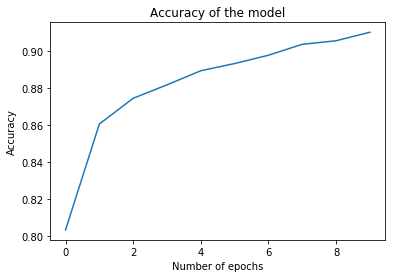

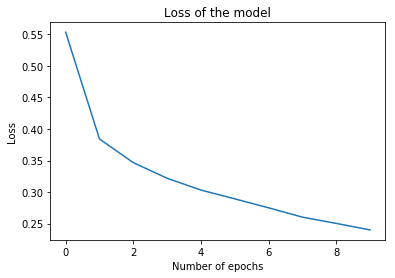

Accuracy of multi-layer neural network:  0.881
Confusion Matrix for  multi-layer neural network: 
[[771   3  21  36   3   1 158   0   7   0]
 [  1 970   2  20   3   0   4   0   0   0]
 [ 10   0 848  12  85   0  44   0   1   0]
 [ 10   5  17 901  40   1  22   0   4   0]
 [  1   1 108  25 832   0  32   0   1   0]
 [  0   0   0   1   0 943   0  25   1  30]
 [ 80   0 109  35  99   0 669   0   8   0]
 [  0   0   0   0   0  23   0 966   0  11]
 [  4   0   6   4   3   6   5   6 966   0]
 [  0   0   0   0   0   4   1  51   0 944]]


In [13]:
#MODEL 2 => Neural Network with multiple hidden layers
from sklearn import metrics
import pandas as pd
import tensorflow as tf
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

#Creating logs file for tensorboard
NAME = "Classification of clothes items - {}".format(int(time.time()))
tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))

X_test3=X_test1/255.0
X_train3=X_train1/255.0
#model is sequential as it stacks layers one after the other
model=tf.keras.Sequential()
#Flattens the image size
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#Dense layer containing 200 hidden nodes, activation => sigmoid
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.Activation('sigmoid'))

#Dense layer containing 200 hidden nodes, activation => sigmoid
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.Activation('sigmoid'))

#Dense output layer wih 10 neurons, activation =>softmax
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

#Adam optimizer has adaptive learning rate.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#To store the loss, accuracy for plotting purposes
history=model.fit(X_train3,y_train1,epochs=10,callbacks=[tensorboard])

#Model evaluation
test_loss,accuracy=model.evaluate(X_test3,y_test1)

#plot_model(model,show_shapes=True,to_file='model.png')


plt.plot(history.history['acc'])
plt.title('Accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

plt.plot(history.history['loss'])
plt.title('Loss of the model')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.show()

#predictions of the model
pred1 = model.predict(X_test3)
#one hot encoded vector
my_dataset2=pd.DataFrame(y_test1)
dummies1=pd.get_dummies(my_dataset2[0])
y_test_new1=dummies1.values
#calculating confusion matrix
y2 = metrics.confusion_matrix(y_test_new1.argmax(axis=1), pred1.argmax(axis=1))

#Calculating accuracy of the dataset
accuracy_lst2=[]
col2=y2.shape[1]
row2=y2.shape[0]
N_total=X_test3.shape[0]
for i in range(row2):
  for j in range(col2):
    if(i==j):
      accuracy_lst2.append(y2[i][j])
      j=j+1
  i=i+1
accuracy2=sum(accuracy_lst2)
accuracy2=accuracy2/N_total
print("Accuracy of multi-layer neural network: ",accuracy2)
print("Confusion Matrix for  multi-layer neural network: ")
print(y2)
                                                                   

In [14]:
%reload_ext tensorboard
%tensorboard --logdir=./logs 

Reusing TensorBoard on port 6006 (pid 2090), started 1:04:02 ago. (Use '!kill 2090' to kill it.)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.8035 - acc: 0.6943
Epoch 2/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.4946 - acc: 0.8125
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.4305 - acc: 0.8378
Epoch 4/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.3916 - acc: 0.8518
Epoch 5/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.3647 - acc: 0.8630
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.3440 - acc: 0.8706
Epoch 7/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.3279 - acc: 0.8757
Epoch 8/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.3109 - acc: 0.8826
Epoch 9/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.2982 - acc: 0.8881
Epoch 10/10
10000/10000 [==============================] - 

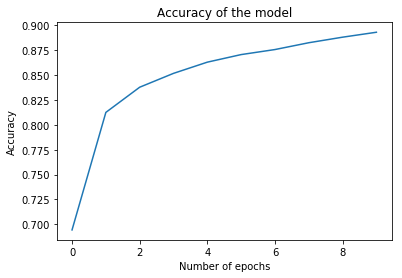

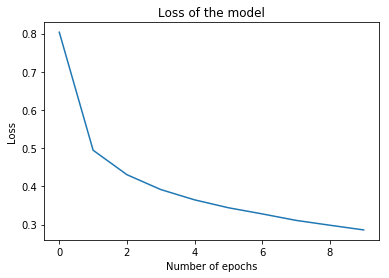

Accuracy of multi-layer neural network:  0.8796
Confusion Matrix for  multi-layer neural network: 
[[855   1  17  17   3   2  99   0   6   0]
 [  3 969   1  19   2   1   4   0   1   0]
 [ 12   0 817  12  83   0  75   0   1   0]
 [ 23   4   8 902  33   1  28   0   1   0]
 [  0   1 107  43 780   0  69   0   0   0]
 [  0   0   0   1   0 964   0  23   0  12]
 [145   0  94  24  81   0 642   0  14   0]
 [  0   0   0   0   0  20   0 958   0  22]
 [  4   0   6   7   4   7   2   8 961   1]
 [  0   0   0   0   0   6   0  46   0 948]]


In [15]:
#MODEL 3 => Convolutional neural network

X_train2=X_train1.reshape(60000,28,28,1)
X_test2=X_test1.reshape(10000,28,28,1)

X_test2=X_test2/255.0
X_train2=X_train2/255.0

#model is sequential as it stacks layers one after the other
model=tf.keras.models.Sequential()
#Convolutional layer with 64 filters of (3,3) size. Activation function is sigmoid
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='sigmoid',input_shape=(28,28,1)))
#Max Pooling layer which takes the output of convolutional layer 2x2 matrix at a time and finds the largest
model.add(tf.keras.layers.MaxPooling2D(2,2))

#Convolutional layer with 32 filters of (3,3) size. Activation function is sigmoid
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='sigmoid'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

#Flattens the size
model.add(tf.keras.layers.Flatten())
#Dense layer containing 128 hidden nodes, activation => sigmoid
#model.add(tf.keras.layers.Dense(128,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(200,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(200,activation=tf.nn.sigmoid))
#Dense output layer wih 10 neurons, activation = > softmax
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

#Adam optimizer is used which has adaptive learning rate.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#To store the loss, accuracy for plotting purposes
history1=model.fit(X_train2,y_train1,epochs=10,callbacks=[tensorboard])

test_loss,accuracy=model.evaluate(X_test2,y_test1)

#plot_model(model,show_shapes=True,to_file='model.png')


plt.plot(history1.history['acc'])
plt.title('Accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

plt.plot(history1.history['loss'])
plt.title('Loss of the model')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.show()

#model's predictions
pred3 = model.predict(X_test2)

#one-hot encoded vector
my_dataset3=pd.DataFrame(y_test1)
dummies1=pd.get_dummies(my_dataset3[0])
y_test_new2=dummies1.values

#calculating the confusion matrix
y3 = metrics.confusion_matrix(y_test_new2.argmax(axis=1), pred3.argmax(axis=1))

#Calculating accuracy of the dataset
accuracy_lst3=[]
col3=y3.shape[1]
row3=y3.shape[0]
N_total=X_test.shape[0]
for i in range(row3):
  for j in range(col3):
    if(i==j):
      accuracy_lst3.append(y3[i][j])
      j=j+1
  i=i+1
accuracy3=sum(accuracy_lst3)
accuracy3=accuracy3/N_total
print("Accuracy of multi-layer neural network: ",accuracy3)
print("Confusion Matrix for  multi-layer neural network: ")
print(y3)
